## Hyper parameter tuning and regularisation

## Hyper parameters- creates a model and training performance will be influence by that

. No of layers

. No of units

. Activation function

. Loss function - how model is good compare target and predicted

. Optimizer

. Drop out rate

. Learning Rate  - step size at each iteration changes while moving towards min of loss function

. No of epochs

. etc........

### No of layers

. output layer

. Regression - only one

Input layer: one

Hidden layer - at least one , depends upon the problem

## No of units
. Output layer

.Regression : One

. Binary classification: One/Two upon the activation function used

. Multi class classification - That many no of classes

. Input layer

Depends upon the no of values or features in the data point

.Hidden layer

Depends upon the problem , generally between 10 and 100

## Activation function

. output layer

. Regression: Default - Linear function

. Binary classification : sigmoid ( if the class levels are 0 and 1 )
                           Tanh ( if the class labels are -1 and 1)

. Multi class classification - Activation- 'softmax'

. Hidden layers

. relu , usually




### Loss function

. Regression : MAE,MSE

. Binary classification - BinaryCross entropy

. Multi class classification - CategoricalCrossentropy/ SParse categorical crossentropy

.

## Optimizer

. Usually , Adam

## Regularisation



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Accessing the dataset

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Visualisation

Text(0.5, 1.0, '5')

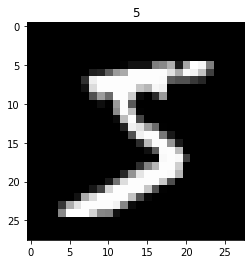

In [ ]:
plt.imshow(X_train[0],'gray')
plt.title(y_train[0])

Text(0.5, 1.0, '3')

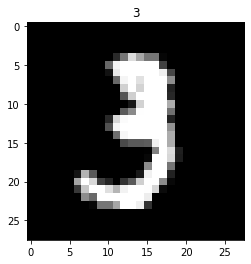

In [ ]:
plt.imshow(X_train[10],'gray')
plt.title(y_train[10])

Text(0.5, 1.0, '7')

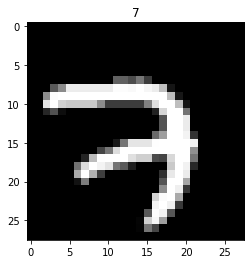

In [ ]:
plt.imshow(X_train[5000],'gray')
plt.title(y_train[5000])

Text(0.5, 1.0, '8')

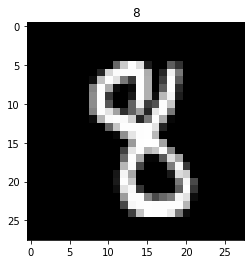

In [ ]:
plt.imshow(X_train[49999],'gray')
plt.title(y_train[49999])

In [ ]:
pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

## Building a Basic Model

In [ ]:
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(300,activation='relu'))
model_1.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
##compiling

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1739 - accuracy: 0.9628
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1721 - accuracy: 0.9623
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1773 - accuracy: 0.9629
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1628 - accuracy: 0.9645
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1526 - accuracy: 0.9663
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1672 - accuracy: 0.9664
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1528 - accuracy: 0.9686
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1527 - accuracy: 0.9681
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1593 - accuracy: 0.9689
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.13

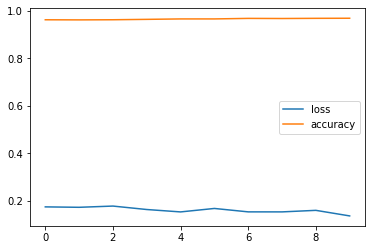

In [ ]:
## Training

tf.random.set_seed(100)
hist_1=model_1.fit(X_train,y_train,epochs=10)
pd.DataFrame(hist_1.history).plot();

In [ ]:
## Evaluation of test data

model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4728 - accuracy: 0.9479


[0.47277480363845825, 0.9478999972343445]

In [ ]:
## Comments

1. Basic model : training loss=0.1852 , test loss = 0.3103  ( there is an overfitting)

## model with normalized data

In [ ]:
## Normalization

normalizer=tf.keras.layers.Normalization()
normalizer.adapt(X_train)
normalizer.adapt(X_test)

X_train=normalizer(X_train)
X_test=normalizer(X_test)

In [ ]:
X_train[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[-3.29633080e-03, -1.03209605e-02, -2.63224952e-02,
        -5.94727769e-02, -1.16537198e-01, -1.97390229e-01,
        -2.83805698e-01, -3.79412591e-01, -4.77584034e-01,
        -5.62326729e-01, -6.23078227e-01, -6.59251928e-01,
        -6.87425375e-01, -7.26367414e-01, -7.58370578e-01,
        -7.74074256e-01, -7.61724949e-01, -7.22140551e-01,
        -6.51364148e-01, -5.54406047e-01, -4.51524764e-01,
        -3.54017019e-01, -2.68543184e-01, -1.91750199e-01,
        -1.24660455e-01, -6.43352345e-02, -2.87100654e-02,
        -8.99783615e-03],
       [-3.29633080e-03, -1.03209605e-02, -2.63224952e-02,
        -5.94727769e-02, -1.16537198e-01, -1.97390229e-01,
        -2.83805698e-01, -3.79412591e-01, -4.77584034e-01,
        -5.62326729e-01, -6.23078227e-01, -6.59251928e-01,
        -6.87425375e-01, -7.26367414e-01, -7.58370578e-01,
        -7.74074256e-01, -7.61724949e-01, -7.22140551e-01,
        -6.51364148e-01, -5.54406047e-0

In [ ]:
# building model with normalised data

model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(300,activation='relu'))
model_2.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2092 - accuracy: 0.9402
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0317 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0268 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0208 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0184 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.017

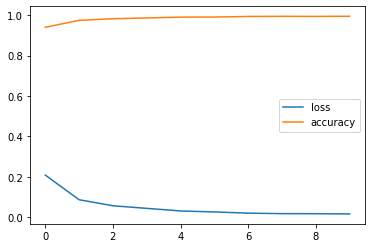

In [ ]:
tf.random.set_seed(100)
hist_2=model_2.fit(X_train,y_train,epochs=10)
pd.DataFrame(hist_2.history).plot();

In [ ]:
model_2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1470 - accuracy: 0.9788


[0.14703814685344696, 0.9787999987602234]

In [ ]:
Basic model : training loss=0.1852 , test loss = 0.3103  ( there is an overfitting)
 model with Normalized data : Training loss =0.0170 , test loss =  0.1470( model improved but overfitting still there)

## model with cross validation

In [ ]:
model_3=tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(300,activation='relu'))
model_3.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2303 - accuracy: 0.9348 - val_loss: 0.1338 - val_accuracy: 0.9614
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0917 - accuracy: 0.9732 - val_loss: 0.0987 - val_accuracy: 0.9742
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0593 - accuracy: 0.9829 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0972 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.1186 - val_accuracy: 0.9741
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.1221 - val_accuracy: 0.9731
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.1124 - val_accuracy

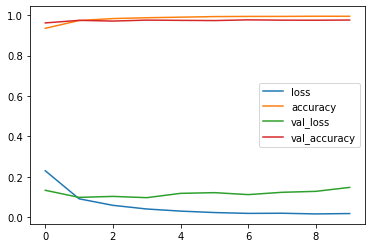

In [ ]:
tf.random.set_seed(100)
# Cross validation using validation split
hist_3=model_3.fit(X_train,y_train,epochs=10,validation_split=0.2)
pd.DataFrame(hist_3.history).plot();

In [ ]:
model_3.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1403 - accuracy: 0.9762


[0.14034612476825714, 0.9761999845504761]

In [ ]:
As the epochs increases graph size increases

In [ ]:
Basic model : training loss=0.1852 , test loss = 0.3103  ( there is an overfitting)
 model with Normalized data : Training loss =0.0170 , test loss =  0.1470( model improved but overfitting still there)

 Model with cross validation: Training loss=0.0187 , test loss= 0.1403 (lower the test loss better)
 model slightly improved , but the gap between validation loss and training loss
 increases , showing that learning is shallow

## Early stopping